Parámetros optimizados (a, h, k): [5.02917509 4.82967794 0.11951309]


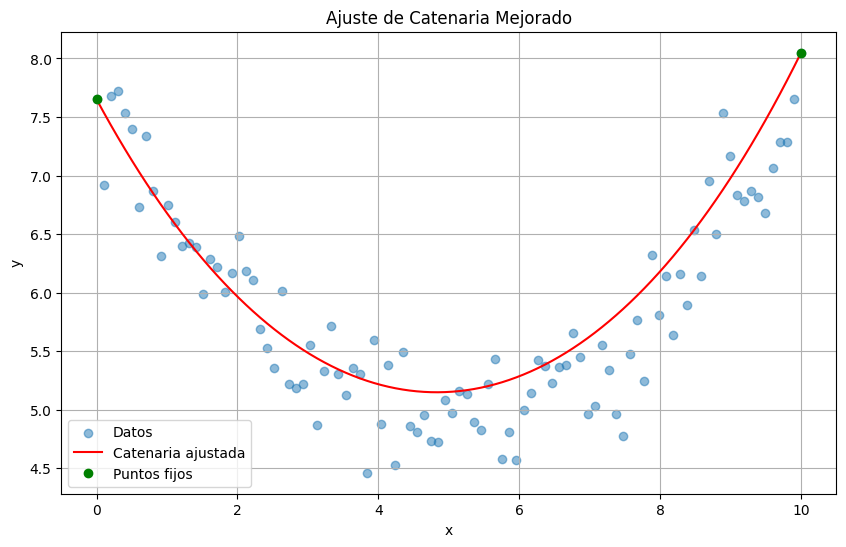

Error cuadrático medio: 0.14300267150374713


In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def catenaria(x, a, h, k):
    return a * np.cosh((x - h) / a) + k

def error_catenaria(params, x, y, x1, y1, x2, y2):
    a, h, k = params
    y_pred = catenaria(x, a, h, k)
    error = np.sum((y - y_pred)**2)
    
    # Aumentar la penalización para los puntos extremos
    error += 1e9 * ((catenaria(x1, a, h, k) - y1)**2 + (catenaria(x2, a, h, k) - y2)**2)

    return error

def ajustar_catenaria(x, y, x1, y1, x2, y2):
    # Mejores estimaciones iniciales
    a_init = np.abs(x2 - x1) / 2  # Longitud característica
    h_init = (x1 + x2) / 2
    k_init = min(y1, y2)
    
    # Restricciones para los parámetros
    bounds = [(0.1, None), (None, None), (None, None)]  # a > 0.1, h y k sin restricciones
    
    # Optimización con un método diferente y restricciones
    resultado = minimize(error_catenaria, [a_init, h_init, k_init], 
                         args=(x, y, x1, y1, x2, y2),
                         method='L-BFGS-B',
                         bounds=bounds)
    
    return resultado.x

# Generación de datos de ejemplo más realistas
x = np.linspace(0, 10, 100)
a_real, h_real, k_real = 5, 5, 0
y_real = catenaria(x, a_real, h_real, k_real)
y = y_real + np.random.normal(0, 0.3, 100)  # Añadir ruido

x1, y1 = x[0], y[0]  # Primer punto fijo
x2, y2 = x[-1], y[-1]  # Segundo punto fijo

params_optimizados = ajustar_catenaria(x, y, x1, y1, x2, y2)

print("Parámetros optimizados (a, h, k):", params_optimizados)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Datos', alpha=0.5)
plt.plot(x, catenaria(x, *params_optimizados), 'r-', label='Catenaria ajustada')
plt.plot([x1, x2], [y1, y2], 'go', label='Puntos fijos')
plt.legend()
plt.title('Ajuste de Catenaria Mejorado')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Cálculo del error
error = np.mean((y - catenaria(x, *params_optimizados))**2)
print(f"Error cuadrático medio: {error}")